# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import json
import statsmodels.api as sm
import statsmodels.formula as smf
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import plotly
import plotly.graph_objects as go
from pprint import pprint as pp

# Loading the Data

In [2]:
G = nx.read_graphml('trading_floor.xml')

# Drawing the Graph 
### Total nodes, total edges and prints the node numbers

Total number of Edges= 384
Total number of Nodes= 192


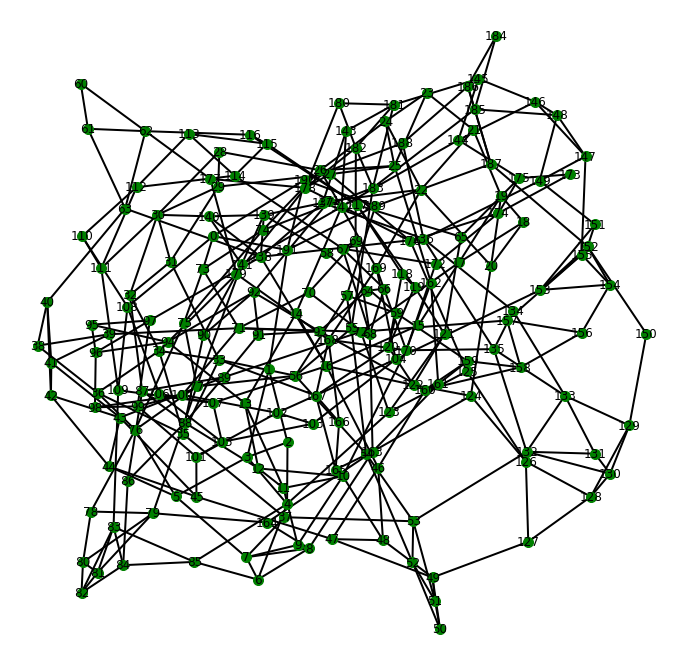

In [3]:
fig = plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos,  node_size= 100, node_color='green')
nx.draw_networkx_edges(G, pos,  width=2.0)
nx.draw_networkx_labels(G, pos=pos)

plt.box(on=None)
plt.axis('off')

print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))

# Initial steps to get all network information

# Building a DataFrame that has the three attributes against each node

In [4]:
l = nx.get_node_attributes(G, 'x_pos')
c = pd.DataFrame(l.items(), columns=['Node', 'X_pos'])

m = nx.get_node_attributes(G, 'y_pos')
d = pd.DataFrame(m.items(), columns=['Node', 'Y_pos'])

n = nx.get_node_attributes(G, 'ai')
e = pd.DataFrame(n.items(), columns=['Node', 'AI'])

DF1 = pd.merge(c, d, how="inner", on="Node")

attrdf = pd.merge(DF1, e, how="inner", on="Node")

In [5]:
attrdf

Node  X_pos  Y_pos  AI
0      0      1      0   4
1      1      1      1   4
2      2      1      2   4
3      3      1      3   4
4      4      1      4   7
..   ...    ...    ...  ..
187  187     22     11  10
188  188     22     12   0
189  189     22     13   8
190  190     22     14   9
191  191     22     15   6

[192 rows x 4 columns]

# Building a DataFrame that gets the edges and their similarities in terms of AI Attributes

In [6]:
edgedf = pd.DataFrame(G.edges, columns = ['A','B'])

In [7]:
A = [i for i in attrdf.AI]
for node, a in zip(G.nodes, A):
    G.nodes[node]["attr"] = a
    
    
similarity = {}
for u, v in G.edges():
    key = "{}-{}".format(u, v)
    value = np.abs(G.nodes[u]["attr"] - G.nodes[v]["attr"])
    similarity[key] = value
    
    
edgedf['similarity'] = [item for item in similarity.values()] #the lesser the score, more similar the nodes are

# Degree Calculation of each of the nodes

### See what ai value the top degree nodes have

###  Calculating the top 10 highest centrality nodes

In [10]:
degree = dict_degree_centrality = nx.degree_centrality(G)
bc = dict_closeness_centrality = nx.closeness_centrality(G)
ec = dict_eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 10 nodes with the largest values of degree centrality in descending order
c10 = dict(Counter(dict_degree_centrality).most_common(10))

# Top 10 nodes with the largest values of closeness centrality (bc) in descending order
bc10 = dict(Counter(dict_closeness_centrality).most_common(10))

# Top 10 nodes with the largest values of eigenvector centrality (ec) in descending order
ec10 = dict(Counter(dict_eigenvector_centrality).most_common(10))

d = nx.degree(G)
d10 = 

In [11]:
degree_ai = []
for key in c10:
    degree_ai.append(G.nodes[key]['attr'])
    #print(key, ' -> ', G.nodes[key]['attr'])

ec_ai = []
for key in ec10:
    ec_ai.append(G.nodes[key]['attr'])
    #print(key, ' -> ', G.nodes[key]['attr'])


bc_ai = []
for key in bc10:
    bc_ai.append(G.nodes[key]['attr'])
    #print(key, ' -> ', G.nodes[key]['attr'])

In [12]:
ecdf = pd.DataFrame({'Nodes': ec10.keys(),
                   'AI Value': ec_ai
                  })

bcdf = pd.DataFrame({'Nodes': bc10.keys(),
                   'AI Value': bc_ai
                  })

degreedf = pd.DataFrame({'Nodes': c10.keys(),
                   'AI Value': degree_ai
                  })


In [13]:
ecdf

Nodes  AI Value
0   138         5
1   136         6
2   135         7
3   170         1
4   139         3
5   140         8
6   137        10
7    30        10
8   168         2
9    33         3

In [14]:
bcdf

Nodes  AI Value
0   138         5
1    16         2
2   170         1
3    72         4
4   169         1
5    71         5
6   122         6
7   168         2
8   136         6
9   179         4

In [15]:
degreedf

Nodes  AI Value
0   138         5
1    16         2
2    30        10
3    71         5
4    72         4
5   136         6
6   163         8
7   170         1
8   178         1
9     4         7

### Maximum nodes with high betweenness centrality and high eigenvector centrality has a very low ai value. So, naturally, their influence on the network work in a detrimental way for spreading the information about AI. The top nodes who have high betweenness centrality also has high eigenvector centrality. 

### Also, nodes with high betweenness and eigencvector centrality also having a high AI value would have significance only if we could calculation over time. In our case, direct degree of each node will play a greater role since we dont have time variant data, but we want to influence our nodes at one time instant. The intuition is that, if a node has high degree, and a high AI value at the same time, it will influence all other nodes it is connected to positively for AI in the diffusion process.

### Plotting the top 10 nodes in terms of degree centrality, betweenness centrality and eigenvector centrality

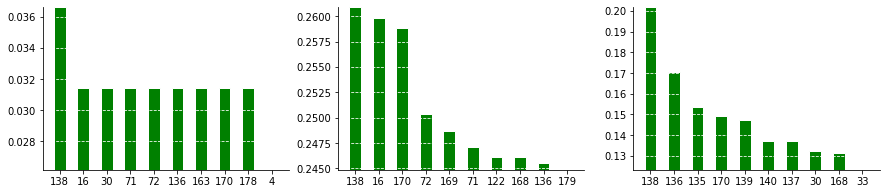

In [16]:
# figure framework
fig = plt.figure(figsize=(15, 3), frameon=True)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# plot data

ax1.bar(c10.keys(), c10.values(), width = .5, color='green', edgecolor='white')
ax1.set_ylim([min(c10.values()), max(c10.values())])

ax2.bar(bc10.keys(), bc10.values(), width = .5, color='green', edgecolor='white')
ax2.set_ylim([min(bc10.values()), max(bc10.values())])

ax3.bar(ec10.keys(), ec10.values(), width = .5, color='green', edgecolor='white')
ax3.set_ylim([min(ec10.values()), max(ec10.values())])

ax1.grid(True, axis='y', ls='--', color='white')
ax2.grid(True, axis='y', ls='--', color='white')
ax3.grid(True, axis='y', ls='--', color='white')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


plt.show()

### Plotting the graphs with respect to inceasing centrality of nodes

# Plotting their relationship

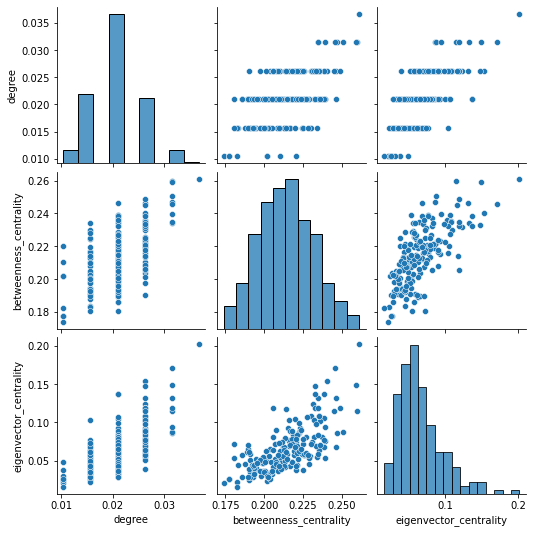

In [18]:
df = pd.DataFrame({'degree': degree,
                   'betweenness_centrality': bc,
                  'eigenvector_centrality': ec
                  })

sns.pairplot(df)

#### Again from this graph we can see, betweenness centrality and eigenvector centrality shows linear relationship. Nodes having high value for both indicate they are acting for bridging a lot many nodes as well as number of their alter is very big. These nodes can account for the presence of hubs in the network.

In [19]:
df.corr()

degree  betweenness_centrality  \
degree                  1.000000                0.582143   
betweenness_centrality  0.582143                1.000000   
eigenvector_centrality  0.676837                0.704299   

                        eigenvector_centrality  
degree                                0.676837  
betweenness_centrality                0.704299  
eigenvector_centrality                1.000000

It shows a very high correlationship between degree and bc (0.736532), then degree and ec (0.676837).
bc and ec are also significantly correlated (0.641171) .

In [20]:
#Adding added node features as node attributes

for node, a in zip(G.nodes, degree.values()):
    G.nodes[node]["degree"] = a
    
for node, a in zip(G.nodes, bc.values()):
    G.nodes[node]["bc"] = a
    
for node, a in zip(G.nodes, ec.values()):
    G.nodes[node]["ec"] = a

# Figuring out network structure

# Is our network connected?

In [21]:
nx.algorithms.number_connected_components(G)

1

# Is our network a core - periphery network?

In [22]:
from graspologic.plot import heatmap

<AxesSubplot:>

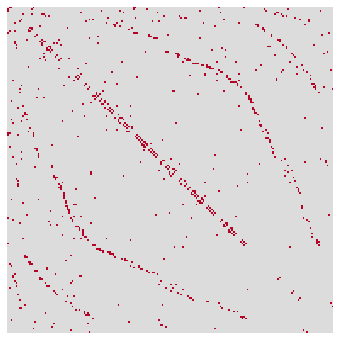

In [23]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
#this gives the adjacent matrix that is sorted when the nodes with the highest degress get on the top
heatmap(G, cmap='coolwarm', ax=ax, sort_nodes=True, cbar=False)

###### ANSWER : NO

# Does our network has communities?

In [24]:
# to detect community and modularity(the right threshold)
from networkx.algorithms.community import girvan_newman, modularity

# to print stuff in a decent way
from pprint import pprint as pp

import itertools

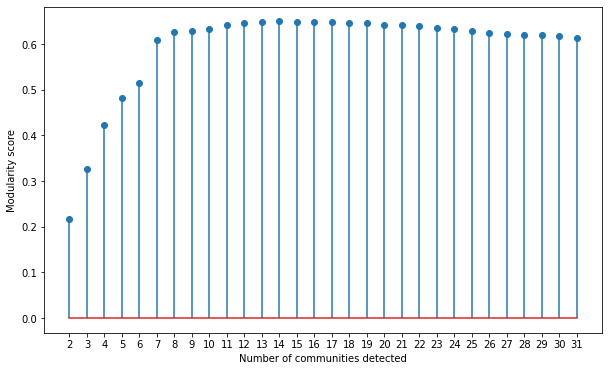

In [25]:
solutions = girvan_newman(G)
k = 30
# register modularity scores
modularity_scores = dict()
# iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)  # sol e community wise list gula nichi
    score = modularity(G, solution)  # each mod er score ber korchhi
    modularity_scores[len(solution)] = score  # dict er key = len (sol) , and dict er value = mod
# plot modularity data
fig = plt.figure(figsize= [10,6])
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()


#best number of communities = 14, with the highest modularity score

###### Best number of communities = 14

# Separating 14 communities

In [26]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [27]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count < 14):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [28]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [29]:
for i in node_groups:
    print (len(i))

19
18
15
11
9
22
17
11
8
12
11
9
10
20


###### Each community has sufficient number of nodes. Our assumption holds right

# Getting community numbers against each group and separating communities

In [30]:
dict_groups = { i : node_groups[i] for i in range(0, len(node_groups) )}

group_number=[]
for j in range (192):
    for i in range (14):
        if str(j) in dict_groups[i]:
            group_number.append(i+1)

# One dataframe contains all nodes relavant features

In [31]:
NodeProperties = attrdf.drop(columns = ['X_pos', "Y_pos"])
NodeProperties["CommunityNumber"] = group_number
NodeProperties['Degree'] = degree.values()
NodeProperties["BC"] = bc.values()
NodeProperties["EC"] = ec.values()
NodeProperties

Node  AI  CommunityNumber    Degree        BC        EC
0      0   4                1  0.020942  0.216553  0.042633
1      1   4                2  0.015707  0.190429  0.024720
2      2   4                2  0.015707  0.192735  0.028654
3      3   4                2  0.020942  0.206934  0.040677
4      4   7                2  0.026178  0.219288  0.057392
..   ...  ..              ...       ...       ...       ...
187  187  10               14  0.020942  0.200420  0.048295
188  188   0               14  0.015707  0.214126  0.060757
189  189   8               14  0.020942  0.207609  0.046085
190  190   9               14  0.020942  0.209660  0.043420
191  191   6               14  0.020942  0.204936  0.036603

[192 rows x 6 columns]

# Positioning nodes Community wise and putting colors according to AI

In [32]:
freq = []
j=0
while j <192:
    k=[]
    for i in range (j+1):
        k.append(NodeProperties['CommunityNumber'][i])
    f = k.count( k[j])
    freq.append(f)
    j = j+1

In [33]:
for node, a in zip(G.nodes, group_number):
    G.nodes[node]["co"] = a

for node, a in zip(G.nodes, freq):
    G.nodes[node]["KY"] = a

In [34]:
# Building nodes
node_x = []
node_y = []
ai_attr = []
com = []
BC = []
EC = []
Degree = []
for node, data in G.nodes(data=True):  
    x = data['co']
    y = data['KY']
    node_x.append(x)
    node_y.append(y)
    ai_attr.append(data['ai'])
    com.append(data['co'])
    BC.append(data['bc'])
    EC.append(data['ec'])
    Degree.append(data['degree'])

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='AI Values',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))




# Building edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = node_x[int(edge[0])], node_y[int(edge[0])]
    x1, y1 = node_x[int(edge[1])], node_y[int(edge[1])]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')




node_adjacencies = []
node_text = []


for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(len(adjacencies[1])) + ' Connections,ID: '+ str(node) + ', AI: ' + str(ai_attr[node]) 
                     + ',C: '+str(com[node]) + ",Degree: " + str(Degree[node]) +
                    ",BC: " + str(BC[node]) + ",EC: " + str(EC[node])
                    
                    )

node_trace.marker.color = ai_attr
# node_trace.marker.size = node_adjacencies
node_trace.text = node_text


# Plot graph

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Traders opinions map onto the knowledge network based on edges',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                #annotations=[ dict(
                    #text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    #showarrow=False,
                    #xref="paper", yref="paper",
                    #x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


# Additional metrics
print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))

Total number of Edges= 384
Total number of Nodes= 192


#### The knowledge exchange network has been positioned according to their community, where each line represents each community. For most of the community, there are nodes with mixture of AI preference and they are less likely to prefer AI. In just community 9, there is a significant good ratio of high and low attribute of AI. Having a look at the network signifies that, in knowledge exchange, the communities don't follow any pattern in terms of AI preference (such as high ai value nodes are clustered together) rather it's more random. This is going to be one of the big obstacles for the diffusion of Positive AI preference in the network.

# The entire Networks Summary Statistics

In [35]:
print(
	"""
All sample descriptive:
{}

""".format(NodeProperties.describe()

))


All sample descriptive:
               AI  CommunityNumber      Degree          BC          EC
count  192.000000       192.000000  192.000000  192.000000  192.000000
mean     4.687500         7.078125    0.020942    0.214272    0.065368
std      2.361615         4.232651    0.004732    0.017585    0.030664
min      0.000000         1.000000    0.010471    0.174111    0.015691
25%      3.000000         3.000000    0.015707    0.201530    0.044292
50%      4.000000         7.000000    0.020942    0.213886    0.058667
75%      6.000000        11.000000    0.026178    0.225969    0.078747
max     10.000000        14.000000    0.036649    0.260929    0.202053




### In the entire network, The Mean AI preference is very low, being less than 5. Which works as the first obstacle in the diffusion of positive AI preference. The minimum and maximum value is known by all of us. The standard deviance is also 2.36 which means overall, the values don't go really up. The entire network is more likely to not adopt AI.

# Separating 14 Communities and Presenting Community Wise Summary Statistics

In [36]:
C1 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 1, ].drop(columns = ["CommunityNumber"])
C2 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 2, ].drop(columns = ["CommunityNumber"])
C3 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 3, ].drop(columns = ["CommunityNumber"])
C4 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 4, ].drop(columns = ["CommunityNumber"])
C5 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 5, ].drop(columns = ["CommunityNumber"])
C6 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 6, ].drop(columns = ["CommunityNumber"])
C7 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 7, ].drop(columns = ["CommunityNumber"])
C8 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 8, ].drop(columns = ["CommunityNumber"])
C9 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 9, ].drop(columns = ["CommunityNumber"])
C10 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 10, ].drop(columns = ["CommunityNumber"])
C11 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 11, ].drop(columns = ["CommunityNumber"])
C12 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 12, ].drop(columns = ["CommunityNumber"])
C13 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 13, ].drop(columns = ["CommunityNumber"])
C14 = NodeProperties.loc[NodeProperties['CommunityNumber'] == 14, ].drop(columns = ["CommunityNumber"])

In [52]:
degreedf

Nodes  AI Value
0   138         5
1    16         2
2    30        10
3    71         5
4    72         4
5   136         6
6   163         8
7   170         1
8   178         1
9     4         7

In [40]:
C1.describe().T

count      mean       std       min       25%       50%       75%  \
AI       19.0  5.210526  1.902599  3.000000  3.500000  5.000000  7.000000   
Degree   19.0  0.019565  0.002369  0.015707  0.018325  0.020942  0.020942   
BC       19.0  0.208696  0.011125  0.190809  0.200752  0.209200  0.217171   
EC       19.0  0.043773  0.012258  0.028887  0.034013  0.042213  0.048497   

             max  
AI      9.000000  
Degree  0.020942  
BC      0.228743  
EC      0.078508

In [39]:
C2.describe().T

count      mean       std       min       25%       50%       75%  \
AI       18.0  4.555556  2.548869  1.000000  3.250000  4.000000  6.500000   
Degree   18.0  0.021233  0.003798  0.015707  0.020942  0.020942  0.024869   
BC       18.0  0.204424  0.013931  0.180359  0.191434  0.205063  0.217501   
EC       18.0  0.059828  0.018084  0.024720  0.052834  0.058055  0.066889   

              max  
AI      10.000000  
Degree   0.026178  
BC       0.222870  
EC       0.092072

In [41]:
C3.describe().T

count      mean       std       min       25%       50%       75%  \
AI       15.0  4.000000  2.236068  1.000000  2.000000  4.000000  6.000000   
Degree   15.0  0.020244  0.005550  0.010471  0.015707  0.020942  0.026178   
BC       15.0  0.217710  0.012438  0.198339  0.208843  0.217788  0.224574   
EC       15.0  0.062266  0.021080  0.023576  0.048694  0.059656  0.075020   

             max  
AI      7.000000  
Degree  0.026178  
BC      0.238750  
EC      0.106228

In [42]:
C4.describe().T

count      mean       std       min       25%       50%       75%  \
AI       11.0  4.000000  1.341641  2.000000  3.000000  4.000000  5.000000   
Degree   11.0  0.020466  0.004352  0.015707  0.015707  0.020942  0.023560   
BC       11.0  0.221077  0.014487  0.193712  0.211177  0.222611  0.232644   
EC       11.0  0.070896  0.020914  0.040573  0.059154  0.067949  0.085264   

             max  
AI      6.000000  
Degree  0.026178  
BC      0.238155  
EC      0.103228

In [53]:
C5.describe().T

count      mean       std       min       25%       50%       75%  \
AI        9.0  5.000000  1.802776  2.000000  4.000000  5.000000  6.000000   
Degree    9.0  0.022106  0.005722  0.010471  0.020942  0.020942  0.026178   
BC        9.0  0.229732  0.015846  0.203842  0.220300  0.226572  0.238155   
EC        9.0  0.070361  0.020481  0.037077  0.061996  0.070580  0.075867   

             max  
AI      8.000000  
Degree  0.031414  
BC      0.259864  
EC      0.114733

In [54]:
C6.describe().T

count      mean       std       min       25%       50%       75%  \
AI       22.0  3.909091  2.201928  1.000000  2.000000  4.000000  5.000000   
Degree   22.0  0.021894  0.005269  0.015707  0.015707  0.020942  0.026178   
BC       22.0  0.222133  0.018788  0.187807  0.212754  0.221449  0.234860   
EC       22.0  0.078673  0.033932  0.029233  0.049831  0.070857  0.106384   

             max  
AI      8.000000  
Degree  0.031414  
BC      0.258808  
EC      0.149143

In [55]:
C7.describe().T #has ID 30

count      mean       std       min       25%       50%       75%  \
AI       17.0  5.352941  2.760009  1.000000  3.000000  5.000000  6.000000   
Degree   17.0  0.023714  0.004938  0.015707  0.020942  0.020942  0.026178   
BC       17.0  0.228828  0.011163  0.215333  0.220046  0.231515  0.232643   
EC       17.0  0.113157  0.031767  0.076240  0.089688  0.106354  0.132282   

              max  
AI      10.000000  
Degree   0.036649  
BC       0.260929  
EC       0.202053

In [57]:
C8.describe().T

count      mean       std       min       25%       50%       75%  \
AI       11.0  5.090909  2.700168  1.000000  4.000000  4.000000  7.000000   
Degree   11.0  0.019990  0.004575  0.010471  0.018325  0.020942  0.020942   
BC       11.0  0.208679  0.015772  0.183301  0.197619  0.210352  0.221065   
EC       11.0  0.070134  0.019005  0.044521  0.060105  0.064692  0.082070   

              max  
AI      10.000000  
Degree   0.026178  
BC       0.230120  
EC       0.108510

In [58]:
C9.describe().T #Check it out

count      mean       std       min       25%       50%       75%  \
AI        8.0  6.000000  3.251373  2.000000  3.750000  5.000000  9.250000   
Degree    8.0  0.020288  0.003355  0.015707  0.019634  0.020942  0.020942   
BC        8.0  0.208825  0.005729  0.200420  0.205632  0.209906  0.213051   
EC        8.0  0.051839  0.008949  0.040165  0.047981  0.052632  0.053892   

              max  
AI      10.000000  
Degree   0.026178  
BC       0.215819  
EC       0.068863

In [59]:
C10.describe().T

count      mean       std       min       25%       50%       75%  \
AI       12.0  4.916667  2.391589  1.000000  3.000000  5.000000  6.250000   
Degree   12.0  0.019634  0.005054  0.010471  0.015707  0.020942  0.022251   
BC       12.0  0.199731  0.017257  0.174111  0.188704  0.197473  0.208804   
EC       12.0  0.041521  0.019195  0.021269  0.028286  0.036649  0.047609   

              max  
AI      10.000000  
Degree   0.026178  
BC       0.230955  
EC       0.080614

In [60]:
C11.describe().T

count      mean       std       min       25%       50%       75%  \
AI       11.0  4.454545  1.967925  1.000000  3.000000  5.000000  6.000000   
Degree   11.0  0.018563  0.003600  0.010471  0.015707  0.020942  0.020942   
BC       11.0  0.217318  0.019634  0.182600  0.202978  0.220300  0.231549   
EC       11.0  0.040843  0.015014  0.015691  0.032362  0.038865  0.048900   

             max  
AI      7.000000  
Degree  0.020942  
BC      0.246134  
EC      0.068101

In [61]:
C12.describe().T

count      mean       std       min       25%       50%       75%  \
AI        9.0  4.222222  1.855921  1.000000  4.000000  4.000000  5.000000   
Degree    9.0  0.023269  0.006981  0.015707  0.015707  0.020942  0.031414   
BC        9.0  0.232101  0.013875  0.203408  0.225768  0.234069  0.239348   
EC        9.0  0.065555  0.019833  0.032182  0.056722  0.057613  0.086106   

             max  
AI      8.000000  
Degree  0.031414  
BC      0.250328  
EC      0.094326

In [62]:
C13.describe().T

count      mean       std       min       25%       50%       75%  \
AI       10.0  4.500000  2.121320  2.000000  3.000000  4.000000  6.000000   
Degree   10.0  0.021466  0.006268  0.010471  0.017016  0.020942  0.026178   
BC       10.0  0.205649  0.023416  0.177674  0.189908  0.201252  0.215396   
EC       10.0  0.094161  0.046503  0.026231  0.063568  0.087343  0.118187   

             max  
AI      8.000000  
Degree  0.031414  
BC      0.245501  
EC      0.170673

In [63]:
C14.describe().T

count      mean       std       min       25%       50%       75%  \
AI       20.0  4.900000  3.041814  0.000000  2.750000  4.000000  7.250000   
Degree   20.0  0.020419  0.003760  0.010471  0.020942  0.020942  0.020942   
BC       20.0  0.202729  0.010025  0.177344  0.196910  0.202678  0.208972   
EC       20.0  0.048757  0.010675  0.025655  0.043648  0.047975  0.052559   

              max  
AI      10.000000  
Degree   0.026178  
BC       0.221578  
EC       0.074438

### Observations:

#### For most of the communities, (C2, C3, C4, C5, C8, C10, C11, C12, C13) the mean AI value goes below 5, the standard deviation is around 1.5 - 2.5, means there are no such influencial nodes to force the nodes towards a behaviour.

#### C6 performs very low with a very low mean and low standard diffusion. If we go and particularly analyze community 6, we see that it has misture of nodes with different AI values, but particularly it contains high degree nodes with very less AI score (node 170 and 178 both are in the top 10 degree node list with AI score of 1 only). We can summarize these two nodes with their higher degree and lowest AI score very negatively impact the entire community.

#### C7 and C9 shows an exception with a higher mean and higher standar deviation. C7 community gets the node 30, which is the 3rd most influencial node in terms of degree and has the AI score of perfect 10. We can evidently see the influence of one high degree and high AI score node on the entire community. 

#### - In case of C9, 4 out of 8 nodes have AI score more than 5, three of them are being really high, and rest 4 nodes have lower values. But we can say these four high nodes together exhibits a positive influence on the community and in return the mean AI score goes up.

# Physical Network with all node attributes, and AI preference as node colors

In [71]:
# Building nodes
node_x = []
node_y = []
ai_attr = []
com = []
BC = []
EC = []
Degree = []
for node, data in G.nodes(data=True):  
    x = data['x_pos']
    y = data['y_pos']
    node_x.append(x)
    node_y.append(y)
    ai_attr.append(data['ai'])
    com.append(data['co'])

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='AI Values',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))




# Building edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = node_x[int(edge[0])], node_y[int(edge[0])]
    x1, y1 = node_x[int(edge[1])], node_y[int(edge[1])]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')




node_adjacencies = []
node_text = []


for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(len(adjacencies[1])) + ' Connections,ID: '+ str(node) + ', AI: ' 
                     + str(ai_attr[node]) + ',C: '+str(com[node]))

node_trace.marker.color = ai_attr
# node_trace.marker.size = node_adjacencies
node_trace.text = node_text


# Plot graph

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Traders opinions map onto the physical layout of the trading floor',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                #annotations=[ dict(
                    #text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    #showarrow=False,
                    #xref="paper", yref="paper",
                    #x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


# Additional metrics
print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))

Total number of Edges= 384
Total number of Nodes= 192


### In the interactive physical network, we can put the communities nodes belong to within the knowledge network, and with this we can observe, most of the nodes that are together or closer in the physical layout belong to the same community. And hence, the AI preference score doesn't show a trend here as well, for example, there is no such table in the trading floor with all nodes having high AI score. The absence of pattern and a strong group for AI preference makes it extremely difficult to be able to diffuse positive attitude towards AI.

### Still we can go on and try to understand the possible scenario under which we can make diffusion for positive AI preference.

# Drawing the Basic Physical Graph to calculate diffusion

In [81]:
xy = []

for i in range (192):
    new = np.asarray(([l[str(i)],m[str(i)]]))
    xy.append(new)
    
posp = {}
keys = range(192)
values = xy

for i in keys:
    posp[str(i)] = values[i]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Total number of Edges= 384
Total number of Nodes= 192


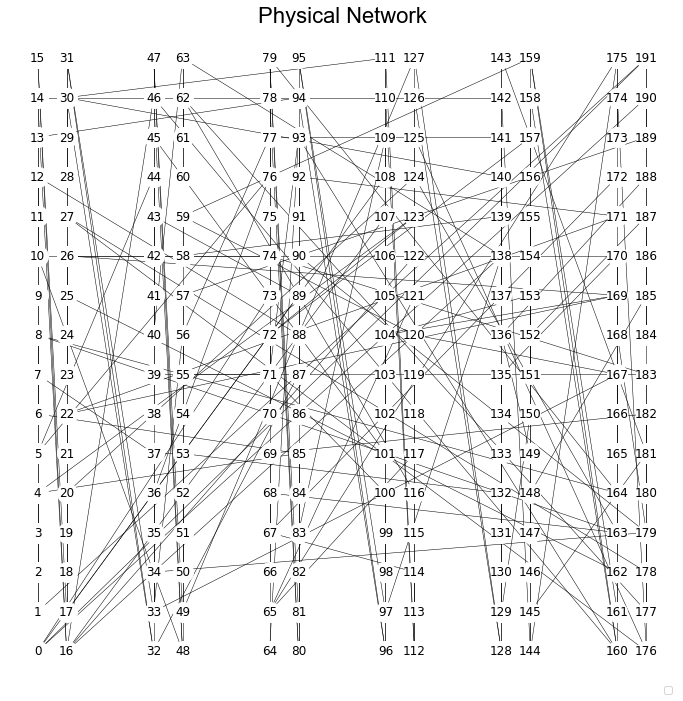

In [82]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
fig = plt.figure(figsize=(12, 12))
pos = posp
# Drawing the graph
nx.draw_networkx_nodes(G, pos,  node_size=400, node_color='white')
nx.draw_networkx_edges(G, pos,  width=0.5)
nx.draw_networkx_labels(G, pos=pos)
#nx.draw_networkx_edge_labels(G, pos, edge_labels=None, label_pos=0.5, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal', alpha=1.0, bbox=None, ax=None, rotate=True)

plt.title('Physical Network', fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)
#plt.savefig('base.png', dpi=400)

# Additional metrics
print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))


# Diffusion

### Assumption 1 : We consider node with AI preference 8 or more as early adopters

#### We are saying for each node, the payoff for adopting or not adopting AI remains the same. So do they adopt or not depends on their neighbours and own attribute values
                 

The early adopter nodes are ['9', '15', '21', '30', '31', '42', '43', '44', '50', '51', '55', '97', '104', '114', '131', '137', '140', '151', '152', '163', '164', '167', '187', '189', '190']


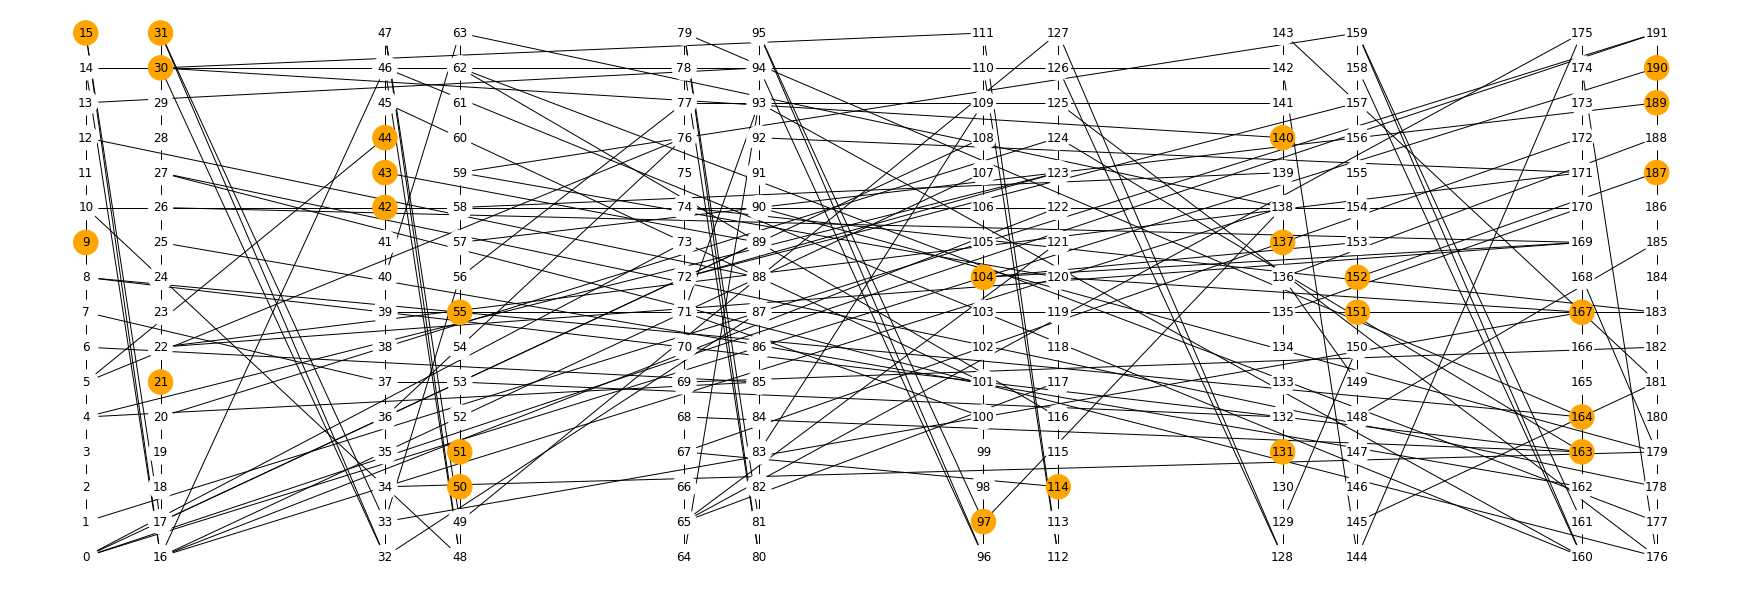

In [83]:
g = G
pos = posp


a = 1
b = 1


degree = nx.degree(g)

adopters = []


for node in g.nodes:
    g.nodes[node]["adopting"] = 0


early_adopters = []


for node, data in G.nodes(data=True):  
    if int(data['ai']) >= 8:
        early_adopters.append(node)
        
print("The early adopter nodes are {}".format(early_adopters))      


adopters.extend(early_adopters)


for adopter in adopters:
    g.nodes[adopter]['adopting'] = 1

colors = []
for n in g.nodes():
    if g.nodes[n]['adopting'] == 1:
        colors.append('orange')
    else:
        colors.append('white')
nx.draw(g, pos=pos, node_size=600, with_labels=True, node_color=colors)



New adopters are 8
New adopters are 153
New adopters are 165
New adopters are 166


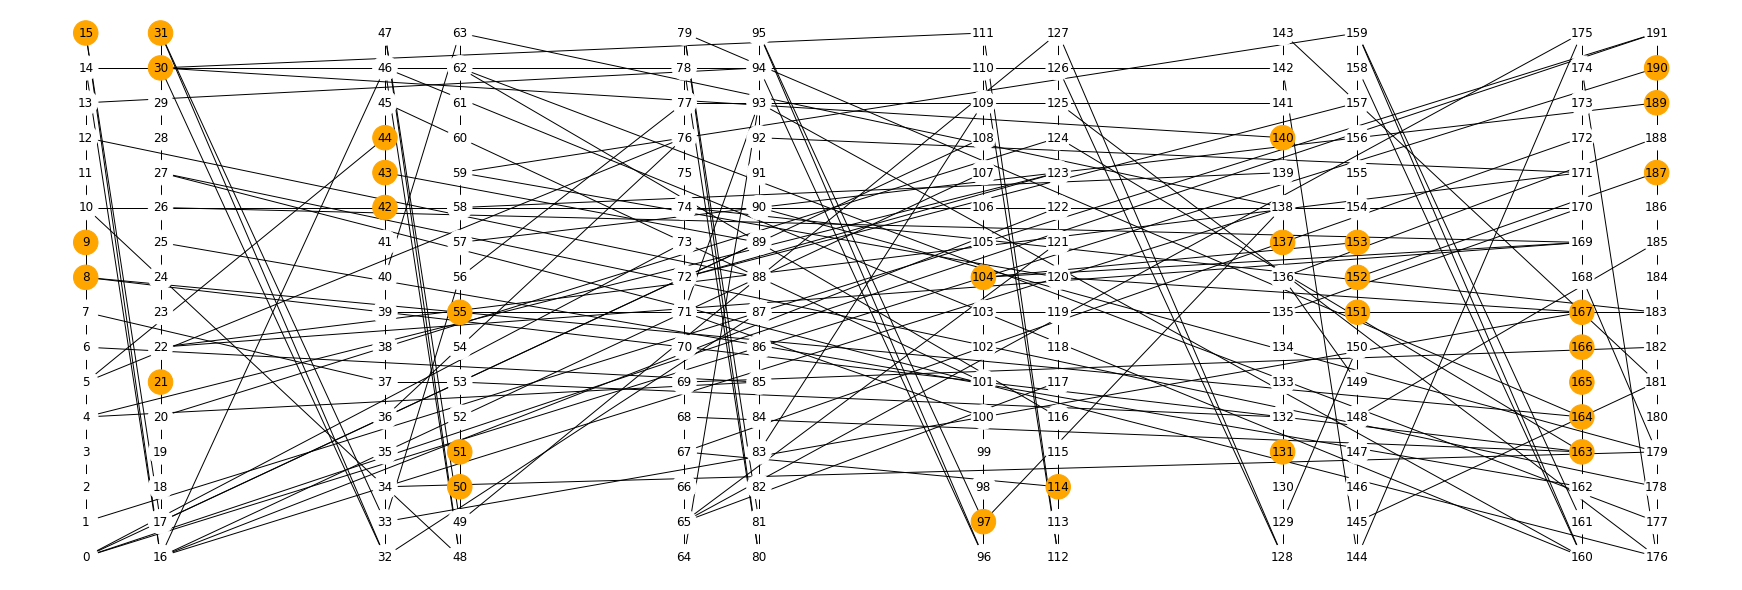

In [84]:
#Based on early adopters, diffusion happends and some new nodes adopt AI

for focal in g.nodes:
    # count adopting neighbors
    focal_nbrs = list(g.neighbors(focal))
    p = np.sum([g.nodes[nbr]['adopting'] for nbr in focal_nbrs])
    # pay-off of adopting new behavior
    d = g.degree(focal)
    a_payoff = p * a
    b_payoff = (d - p ) * b
    # decision to adopt
    if (g.nodes[focal]['adopting'] == 0) & (a_payoff > b_payoff):
        g.nodes[focal]['adopting'] = 1
        adopters.extend(focal)
        print ("New adopters are {}".format(focal))
    else:
        pass

#adopters

# %% draw the network
colors = []
for n in g.nodes():
    if g.nodes[n]['adopting'] == 1:
        colors.append('orange')
    else:
        colors.append('white')
nx.draw(g, pos=pos, node_size=600, with_labels=True, node_color=colors)

In [76]:
### Only 4 new nodes adopt the AI in the diffusion process

### If we consider the nodes with ai value greater or equal to 6 as early adopters, the diffusion automatically increases, although this idea doesn't seem really practical

The early adopter nodes are ['4', '8', '9', '15', '17', '18', '19', '21', '30', '31', '36', '38', '42', '43', '44', '46', '49', '50', '51', '55', '57', '60', '61', '65', '73', '75', '77', '85', '87', '90', '92', '93', '94', '95', '96', '97', '98', '100', '102', '104', '112', '114', '116', '121', '122', '125', '129', '131', '135', '136', '137', '140', '142', '151', '152', '153', '163', '164', '167', '171', '187', '189', '190', '191']
The new adopters are 0
The new adopters are 6
The new adopters are 7
The new adopters are 32
The new adopters are 56
The new adopters are 62
The new adopters are 76
The new adopters are 91
The new adopters are 99
The new adopters are 103
The new adopters are 113
The new adopters are 115
The new adopters are 117
The new adopters are 123
The new adopters are 133
The new adopters are 134
The new adopters are 138
The new adopters are 139
The new adopters are 141
The new adopters are 143
The new adopters are 150
The new adopters are 165
The new adopters are 166


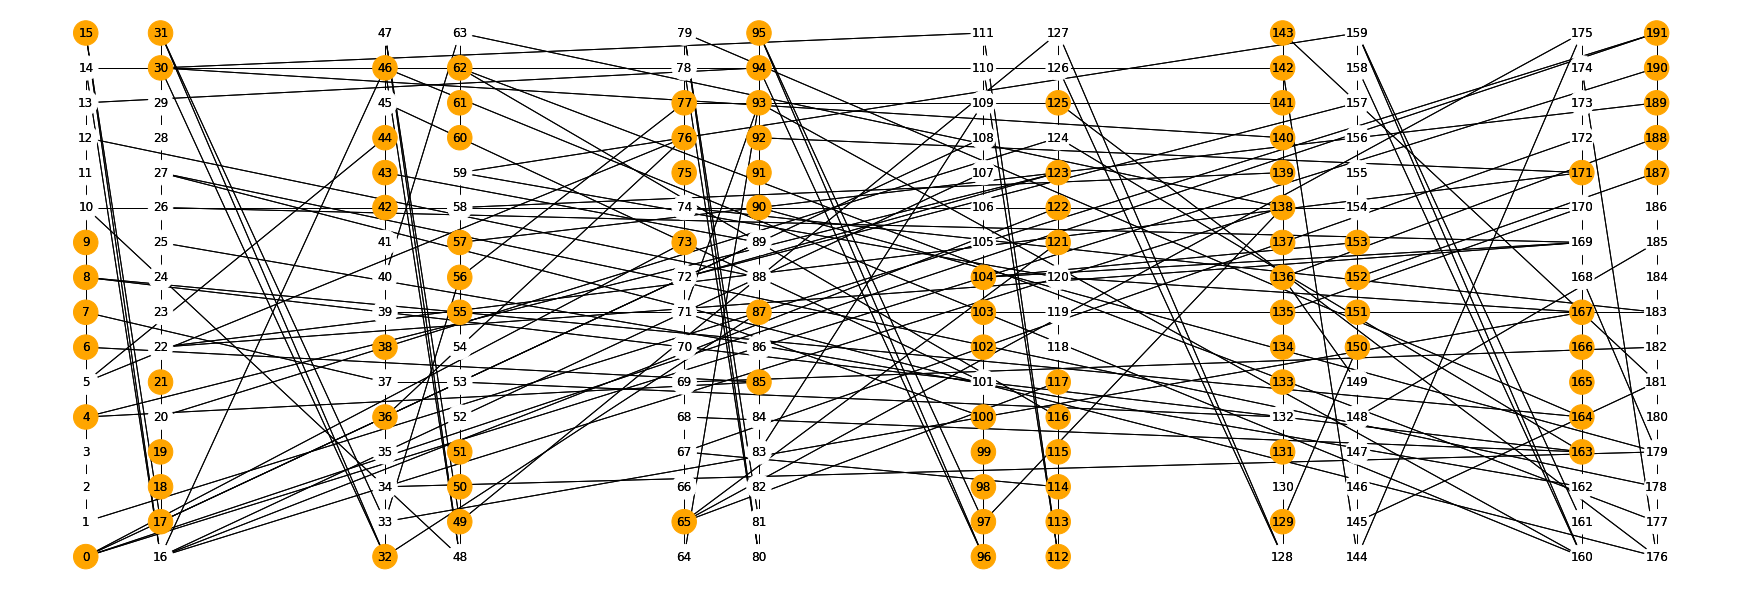

In [85]:
g = G
pos = posp
nx.draw(g, node_color='w', pos=pos, with_labels=True)


a = 1
b = 1

degree = nx.degree(g)


adopters = []

for node in g.nodes:
    g.nodes[node]["adopting"] = 0


early_adopters = []

for node, data in G.nodes(data=True):  
    if int(data['ai']) >= 6:
        early_adopters.append(node)
        
print("The early adopter nodes are {}".format(early_adopters))         


adopters.extend(early_adopters)

for adopter in adopters:
    g.nodes[adopter]['adopting'] = 1



for focal in g.nodes:
    # count adopting neighbors
    focal_nbrs = list(g.neighbors(focal))
    p = np.sum([g.nodes[nbr]['adopting'] for nbr in focal_nbrs])
    # pay-off of adopting new behavior
    d = g.degree(focal)
    a_payoff = p * a
    b_payoff = (d - p ) * b
    # decision to adopt
    if (g.nodes[focal]['adopting'] == 0) & (a_payoff > b_payoff):
        g.nodes[focal]['adopting'] = 1
        adopters.extend(focal)
        print ("The new adopters are {}".format(focal))
    else:
        pass



colors = []
for n in g.nodes():
    if g.nodes[n]['adopting'] == 1:
        colors.append('orange')
    else:
        colors.append('white')
nx.draw(g, pos=pos, node_size=600, with_labels=True, node_color=colors)




# How to increase the diffusion?

## 1. Using the high degree centrality nodes as early adopters and see how it accelarates diffusion

The early adopter nodes are ['9', '15', '21', '30', '31', '42', '43', '44', '50', '51', '55', '97', '104', '114', '131', '137', '140', '151', '152', '163', '164', '167', '187', '189', '190', '138', '16', '30', '71', '72', '136', '163', '170', '178', '4']
New adopters are 8
New adopters are 70
New adopters are 139
New adopters are 153
New adopters are 165
New adopters are 166
New adopters are 168
New adopters are 169
New adopters are 188


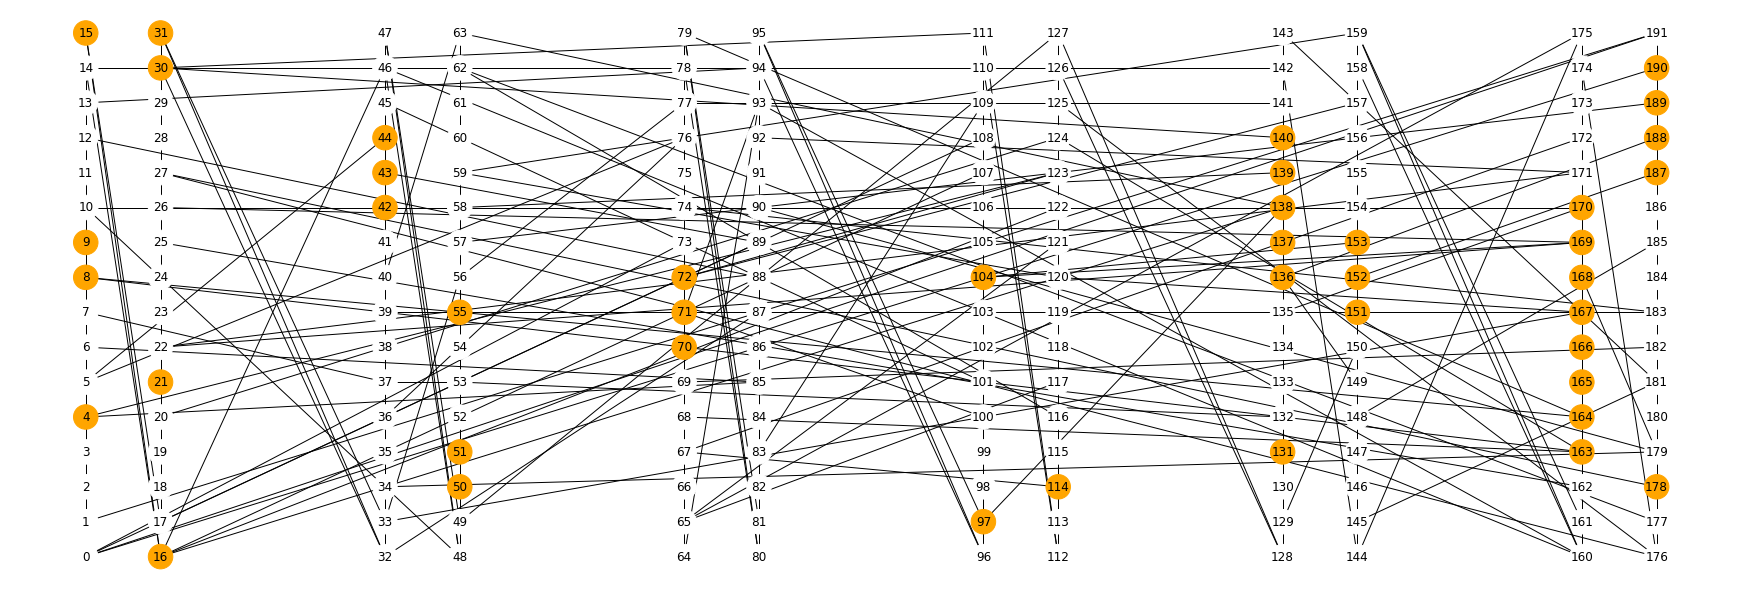

In [86]:
g = G
pos = posp


a = 1

b = 1

degree = nx.degree(g)

adopters = []

for node in g.nodes:
    g.nodes[node]["adopting"] = 0

early_adopters = []


for node, data in G.nodes(data=True):  
    if int(data['ai']) >= 8:
        early_adopters.append(node)

#adding 10 nodes with highest betweenness centrality
for i in c10.keys():
    early_adopters.append(i)
        
print("The early adopter nodes are {}".format(early_adopters))      


adopters.extend(early_adopters)

for adopter in adopters:
    g.nodes[adopter]['adopting'] = 1




for focal in g.nodes:
    # count adopting neighbors
    focal_nbrs = list(g.neighbors(focal))
    p = np.sum([g.nodes[nbr]['adopting'] for nbr in focal_nbrs])
    # pay-off of adopting new behavior
    d = g.degree(focal)
    a_payoff = p * a
    b_payoff = (d - p ) * b
    # decision to adopt
    if (g.nodes[focal]['adopting'] == 0) & (a_payoff > b_payoff):
        g.nodes[focal]['adopting'] = 1
        adopters.extend(focal)
        print ("New adopters are {}".format(focal))
    else:
        pass


# %% draw the network
colors = []
for n in g.nodes():
    if g.nodes[n]['adopting'] == 1:
        colors.append('orange')
    else:
        colors.append('white')
nx.draw(g, pos=pos, node_size=600, with_labels=True, node_color=colors)

###### Additional 5 nodes adopt AI. This process doesn't really helps. Still the low ai attribute value nodes do not adopt the AI.The intution is that they come with their previous bias and dont get very much influenced by their neighbours adoption

## 2. Increase the payoff for adopting the new behaviour.


The early adopter nodes are ['9', '15', '21', '30', '31', '42', '43', '44', '50', '51', '55', '97', '104', '114', '131', '137', '140', '151', '152', '163', '164', '167', '187', '189', '190']
New adopters are 8
New adopters are 23
New adopters are 28
New adopters are 29
New adopters are 32
New adopters are 33
New adopters are 34
New adopters are 35
New adopters are 36
New adopters are 37
New adopters are 38
New adopters are 39
New adopters are 40
New adopters are 41
New adopters are 45
New adopters are 49
New adopters are 52
New adopters are 53
New adopters are 54
New adopters are 56
New adopters are 57
New adopters are 95
New adopters are 96
New adopters are 98
New adopters are 99
New adopters are 100
New adopters are 101
New adopters are 102
New adopters are 103
New adopters are 105
New adopters are 106
New adopters are 107
New adopters are 113
New adopters are 115
New adopters are 116
New adopters are 117
New adopters are 118
New adopters are 119
New adopters are 120
New adopters ar

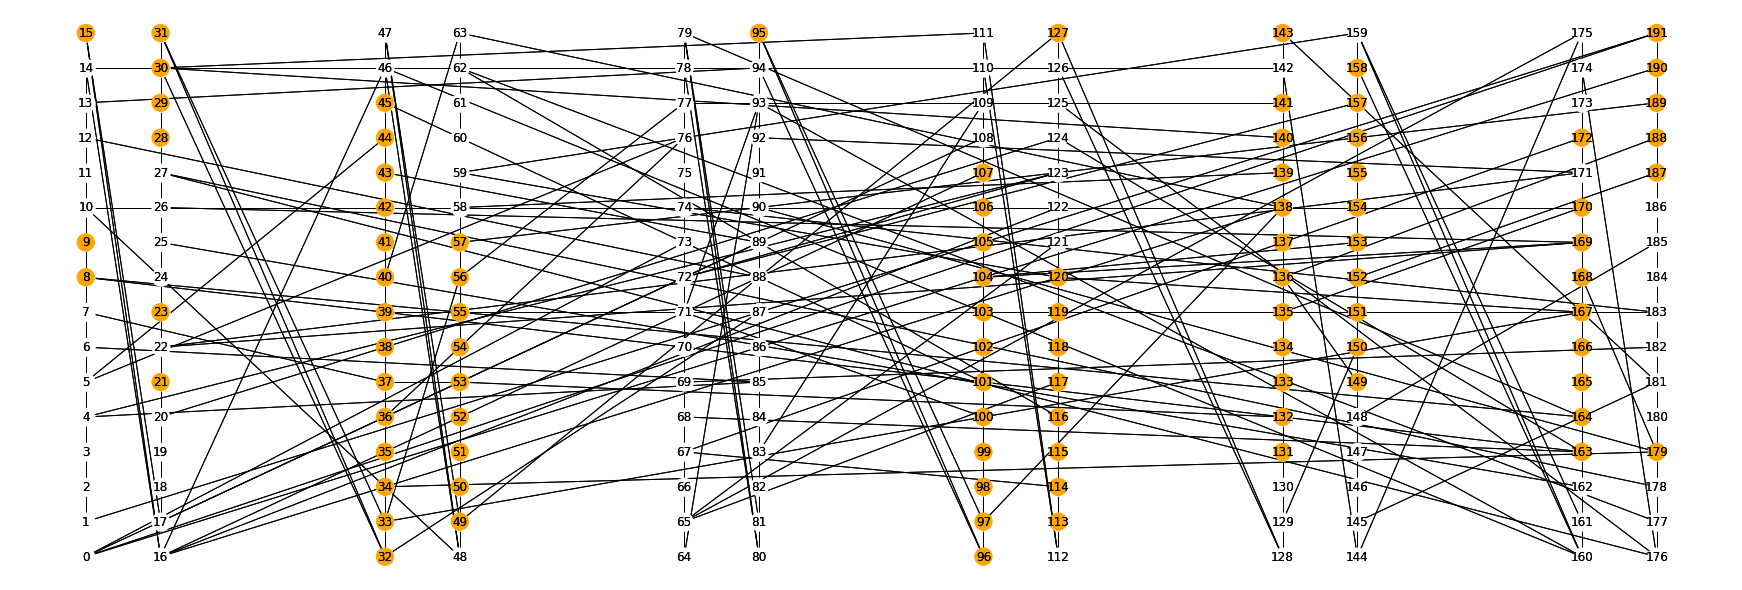

In [87]:
g = G
pos = posp
nx.draw(g, node_color='w', pos=pos, with_labels=True)


a = 3
b = 1

degree = nx.degree(g)

adopters = []

for node in g.nodes:
    g.nodes[node]["adopting"] = 0



early_adopters = []
for node, data in G.nodes(data=True):  
    if int(data['ai']) >= 8:
        early_adopters.append(node)
        
print("The early adopter nodes are {}".format(early_adopters))


adopters.extend(early_adopters)
for adopter in adopters:
    g.nodes[adopter]['adopting'] = 1



for focal in g.nodes:
    # count adopting neighbors
    focal_nbrs = list(g.neighbors(focal))
    p = np.sum([g.nodes[nbr]['adopting'] for nbr in focal_nbrs])
    # pay-off of adopting new behavior
    d = g.degree(focal)
    a_payoff = p * a
    b_payoff = (d - p ) * b
    # decision to adopt
    if (g.nodes[focal]['adopting'] == 0) & (a_payoff > b_payoff):
        g.nodes[focal]['adopting'] = 1
        adopters.extend(focal)
        print ("New adopters are {}".format(focal))
    else:
        pass
adopters

# %% draw the network
colors = []
for n in g.nodes():
    if g.nodes[n]['adopting'] == 1:
        colors.append('orange')
    else:
        colors.append('white')
nx.draw(g, pos=pos, with_labels=True, node_color=colors)

### In general, the nodes with less ai attribute value are more reluctant to adopt AI
### We can assign higher payoff to nodes that have low ai attribute, a lesser payoff for nodes having average ai value, and just 1 for nodes with high attribute value since they are more likely to adopt without payoff


['9', '15', '21', '30', '31', '42', '43', '44', '50', '51', '55', '97', '104', '114', '131', '137', '140', '151', '152', '163', '164', '167', '187', '189', '190']
8
23
28
29
32
33
34
35
36
37
41
45
49
52
53
54
56
57
113
115
127
132
133
134
135
136
138
139
141
143
149
150
153
154
155
156
157
158
165
166
168
169
170
172
179
188
191


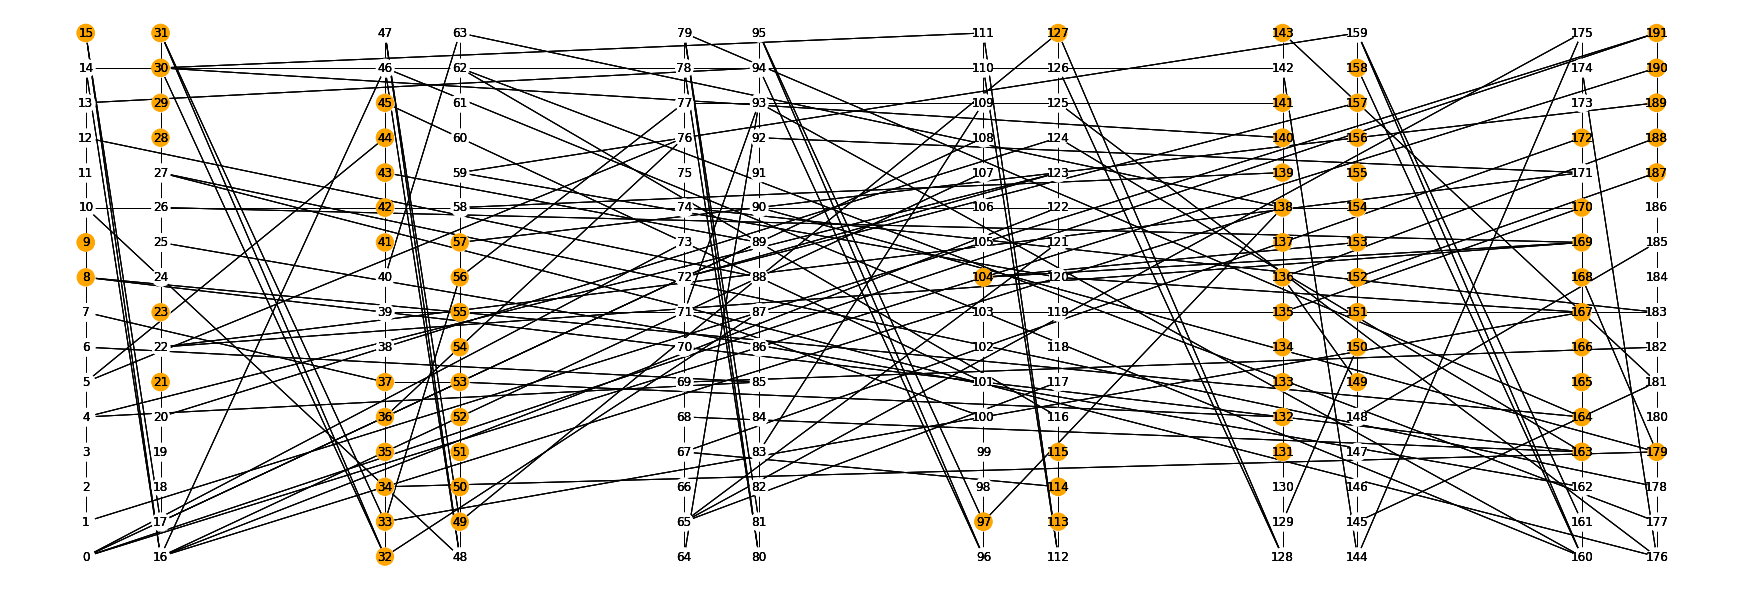

In [88]:
g = G
pos = posp
nx.draw(g, node_color='w', pos=pos, with_labels=True)


a = 1
b = 1
degree = nx.degree(g)

adopters = []

for node in g.nodes:
    g.nodes[node]["adopting"] = 0


early_adopters = []
for node, data in G.nodes(data=True):  
    if int(data['ai']) >= 8:
        early_adopters.append(node)
        
print(early_adopters)        

adopters.extend(early_adopters)
for adopter in adopters:
    g.nodes[adopter]['adopting'] = 1


for focal, data in g.nodes(data=True):
    # count adopting neighbors
    focal_nbrs = list(g.neighbors(focal))
    p = np.sum([g.nodes[nbr]['adopting'] for nbr in focal_nbrs])
    # pay-off of adopting new behavior
    d = g.degree(focal)
    new_a = a
    new_b = b
    if int(data['ai'] >= 7):
        new_a = 1
        new_b = 1
    elif int(data['ai'] >= 5):
        new_a = 2
        new_b = 1
    else:
        new_a = 3
        new_b = 1
    a_payoff = p * new_a
    b_payoff = (d - p ) * new_b
    # decision to adopt
    if (g.nodes[focal]['adopting'] == 0) & (a_payoff > b_payoff):
        g.nodes[focal]['adopting'] = 1
        adopters.extend(focal)
        print(focal)
    else:
        pass
adopters

# %% draw the network
colors = []
for n in g.nodes():
    if g.nodes[n]['adopting'] == 1:
        colors.append('orange')
    else:
        colors.append('white')
nx.draw(g, pos=pos, with_labels=True, node_color=colors)

# The Second Method, which is assigning a higher payoff for adopting AI for all nodes works as the best approach for diffusion since increasing overall payoff for all employees is a more reasonable approach.